In [0]:
from requests import get
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import numpy as np
base_url = "https://www.eventbriteapi.com/v3/"
token = "SQB3NKLMJV6TJ2YM57A2"

In [0]:
#define a function to generate different events for different keywords
def table(keyword):
  city = "San Francisco, CA"
  distance = "70mi"
  url = base_url+'events/search/?token={0:s}&location.address={1:s}&location.within={2:s}'.format(token,city,distance)
  url = url + '&q={0:s}'.format(keyword)
  query = requests.get(url)
  c = query.content
  result = json.loads(c) #If the query succeeded, it gives a dictionary that has pagination in formation, and also events and location of the search
  print('result.keys() has',result.keys())
  pagination = result['pagination']
  print(pagination)
  print("page_count:", pagination["page_count"])
  page_count = pagination["page_count"] + 1 
  events = result['events']
  #print("How many events returned in this response?",len(events)) #how many dictionaries? BTW each event is represented as a dictionary in ld
  
  # query events
  events = []
  for i in range(1,page_count):
    page = i
    query = requests.get(url+'&page={0:d}'.format(i))
    result = json.loads(query.content)
    for e in result['events']:
      events.append(e)
  #print(len(events))
  
  
  # create data frame from events
  df = pd.DataFrame()

  df['description']= [e['description']['text'] for e in events]

  
  for k in events[0].keys():
    #print(k)
    if k == 'series_id':
      pass
    elif k == 'description':
      df[k] = [e[k]['text'] for e in events]
    elif k == 'name':
      df[k] = [e[k]['text'] for e in events]
    else:
      df[k] = [e[k] for e in events]
  
  df = df[['name','description', 'published','summary']]
  return df

In [3]:
kw_data = table("data science")
kw_data.shape

result.keys() has dict_keys(['pagination', 'events', 'location'])
{'object_count': 1022, 'page_number': 1, 'page_size': 50, 'page_count': 21, 'has_more_items': True}
page_count: 21


(1022, 4)

In [4]:
kw_ml = table("machine learning")
kw_ml.shape

result.keys() has dict_keys(['pagination', 'events', 'location'])
{'object_count': 231, 'page_number': 1, 'page_size': 50, 'page_count': 5, 'has_more_items': True}
page_count: 5


(231, 4)

In [5]:
kw_py = table("python")
kw_py.shape

result.keys() has dict_keys(['pagination', 'events', 'location'])
{'object_count': 121, 'page_number': 1, 'page_size': 50, 'page_count': 3, 'has_more_items': True}
page_count: 3


(121, 4)

In [6]:
kw_dl = table("deep learning")
kw_dl.shape

result.keys() has dict_keys(['pagination', 'events', 'location'])
{'object_count': 329, 'page_number': 1, 'page_size': 50, 'page_count': 7, 'has_more_items': True}
page_count: 7


(329, 4)

In [7]:
# combine tables
df = kw_data.append(kw_ml,ignore_index=True)
df = df.append(kw_py,ignore_index=True)
df = df.append(kw_dl,ignore_index=True)
df.shape

(1703, 4)

In [8]:
df.head()
df.description[0]

"This FREE event is especially for beginners in San Francisco who want to learn the basics Data Science with Python!\nThis is a friendly workshop focused on learning the basics and is for absolute beginners! We hope you'll leave excited and more comfortable using Python!\nWhat You'll Learn:\n1) What is Python and Data Science\n2) Understanding Data Sets\n3) Basic Python Syntax and uses\n4) Visualizing Data Sets\n5) Using NLP and/or kNN to run your first machine learning model\nHow to Prepare:\n- Bring your laptop, fully charged (bring your charger just in case)\n- Install Google Chrome (any browser will do, but Chrome can do some cool things): https://www.google.com/chrome/browser/desktop/\n- sign up for a repl account: https://repl.it/repls\nPrerequisites:\nNone\nAbout Galvanize:\nGalvanize is premiere dynamic learning community for technology. With campuses located in booming technology sectors throughout the country, Galvanize provides a community for each the following:\nEducation 

In [0]:
#create wordcloud 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
print("There are {} events and {} features in this dataset.".format(df.shape[0],df.shape[1]))


There are 1703 events and 4 features in this dataset.


In [0]:
?WordCloud


There are 37448 words in the combination of all name.
Intro to Python for Data Science  *Webinar* Data Science 101 Workshop The Business of Data Science - San Francisco ODSC West 2019 - Open Data Science Conference Dynamic Talks: San Francisco "Data science and analytics" CANCELED | Intro to Data Science: The Art of Visualizations CANCELED | Intro to Data Science: Build a Predictive Model Thinkful Webinar | Getting Started in Data Science Machine/Deep Learning & Data Science CLASSROOM Training Machine Learning & Data Science Training - San Francisco Data Science - 6/24 to 6/28 Machine Learning & Data Science Training - Oakland CA Machine Learning & Data Science Training - Berkeley CA Machine Learning & Data Science Training - Fremont CA Machine Learning & Data Science Training -   Pleasanton CA Machine Learning & Data Science Training - Sunnyvale CA Machine Learning & Data Science Training -  Concord CA Machine Learning & Data Science Training -  Oakland CA Machine Learning & Data Scie

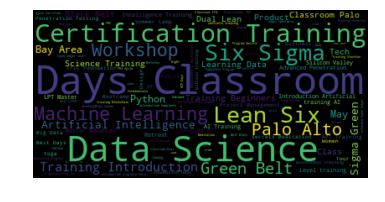

In [12]:
# Start with name 

stopwords = set(STOPWORDS)
stopwords.update(["San","Francisco", "San","Jose","CA"]) 

text = " ".join(words for words in df.name.drop_duplicates())
print ("There are {} words in the combination of all name.".format(len(text)))
print(text)



# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
df.description.drop_duplicates()

0       This FREE event is especially for beginners in...
1       This FREE event is especially for beginners in...
2       \n\nWant to know why Data Science is so *fire*...
3       Learn to harness the power of data science and...
4       Are you ready to learn new skills, connect to ...
5       Come join us at the first event of our free te...
6       The beauty behind the data...visualizations. I...
7       If you're curious about Data Science, then Pyt...
8       What is a Data Scientist? What is Big Data? Wo...
9       Machine Learning & Data Science Training\r\n6 ...
11      What factors make some people live longer than...
21      Key Features:\n\n32 hours of Classroom trainin...
25      Key Features:\n\n32 hours of Classroom trainin...
26      This is a great opportunity to start a data sc...
30      2 Day Python Deep Dive and Python for Data Sci...
31      No matter what your product is, data & analyti...
32      Urban, suburban, rural and remote communities ...
33      Meet O

In [18]:
#text = df.description

text = " ".join(words for words in df.description.drop_duplicates())
print ("There are {} words in the combination of all description.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: ignored

In [15]:
df.summary.drop_duplicates().shape

(493,)

In [16]:
#text = df.description

stopwords = set(STOPWORDS)
stopwords.update(["will", "day"]) 


text = " ".join(words for words in df.summary.drop_duplicates())
print ("There are {} words in the combination of all summary.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: ignored

In [0]:
#df.summary[1900].replace('\n',' ').replace('\r','')
found = (np.where(np.array([d.find('Six') for d in df.description.drop_duplicates()]) != -1))
[df.name[f] for f in found]

AttributeError: ignored

In [19]:
#" ".join(words for words in df.summary).replace('\n',' ')
#df.summary.shape
df.drop_duplicates()

,name,description,published,summary
0,Intro to Python for Data Science,This FREE event is especially for beginners in...,2019-04-29T17:37:37Z,This FREE event is especially for beginners in...
1,Intro to Python for Data Science,This FREE event is especially for beginners in...,2019-02-19T20:46:47Z,This FREE event is especially for beginners in...
2,*Webinar* Data Science 101 Workshop,\n\nWant to know why Data Science is so *fire*...,2019-04-14T16:40:33Z,\n\nWant to know why Data Science is so *fire*...
3,The Business of Data Science - San Francisco,Learn to harness the power of data science and...,2019-04-12T18:39:19Z,Learn to harness the power of data science and...
4,ODSC West 2019 - Open Data Science Conference,"Are you ready to learn new skills, connect to ...",2018-12-31T15:49:08Z,"Are you ready to learn new skills, connect to ..."
5,"Dynamic Talks: San Francisco ""Data science and...",Come join us at the first event of our free te...,2019-05-01T17:58:12Z,Come join us at the first event of our free te...
6,CANCELED | Intro to Data Science: The Art of V...,The beauty behind the data...visualizations. I...,2019-04-03T16:15:30Z,The beauty behind the data...visualizations. I...
7,CANCELED | Intro to Data Science: Build a Pred...,"If you're curious about Data Science, then Pyt...",2019-04-03T16:23:36Z,"If you're curious about Data Science, then Pyt..."
8,Thinkful Webinar | Getting Started in Data Sci...,What is a Data Scientist? What is Big Data? Wo...,2019-05-02T18:35:10Z,What is a Data Scientist? What is Big Data? Wo...
9,Machine/Deep Learning & Data Science CLASSROOM...,Machine Learning & Data Science Training\r\n6 ...,2018-10-12T23:47:32Z,Machine Learning & Data Science Training\r\n6 ...
